In [22]:
import pandas as  pd
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import re

## ***PARTIE 1*** ##

In [23]:
dfG = pd.read_csv("Data/GSM3533230_CGND-HRA-00013_counts.txt", sep="\t")
dfG.head()

,gene/TE,../../STAR_v252_mapping/CGND_12616/HRA-00013_PE.bam
0,A1BG,42
1,A1BG-AS1,149
2,A1CF,0
3,A2M,3327
4,A2M-AS1,101


In [24]:
def emplacement(l,gene_name):
    for i in range(len(l)):
        if gene_name == l[i]:
            return i+1


In [72]:
class MyDataFrame:
    
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.df_list = [] # liste pour stocker les dataframes
        self.df = pd.DataFrame() # dataframe final
        
        # liste de tous les fichiers dans le dossier
        file_list = os.listdir(self.folder_path)

        # boucle à travers tous les fichiers dans le dossier
        for filename in file_list:
            if filename.endswith(".txt"): # vérifie que le fichier est un fichier .txt
                file_path = os.path.join(self.folder_path, filename) 
                df = pd.read_csv(file_path, sep="\t")  # crée un dataframe à partir du fichier
                sample_name = re.search("GSM\d+", filename).group()
                df.rename(columns={ df.columns[1]: sample_name }, inplace = True)
                self.df_list.append(df) # ajoute le dataframe à la liste
        
        self.df = pd.concat(self.df_list, axis=1) # concatène tous les dataframes dans la liste en un seul dataframe à partir de la colonne 1
        self.df = self.df.loc[:,~self.df.columns.duplicated()] # supprime les colonnes "gene/TE" en doublon
        self.df = self.df.transpose()
    
    #affichage
    def aff(self):
        print(self.df)
        
    # Getter pour accéder à la valeur d'une cellule en donnant le nom de l'échantillon et le nom du gène en paramètre
    def get_value(self, sample_id, gene_name):
        return self.df[sample_id][emplacement(self.df.iloc[0].values,gene_name)]
    
    def get_colonne(self,gene_name):
        return self.df.iloc[emplacement(self.df.iloc[0].values,gene_name)].values
    def get_ligne(self,id):
        return self.df.iloc[id].values
    def getMatrix(self):
        return self.df
    




In [82]:
import pandas as pd
import glob
import re

path = "./Data" # the path of the data

pdList = [] # variable to temporary store all dataframes (one for each txt file)
# For all txt file
for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) # put the file in a dataframe
    sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
    df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
    df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
    pdList.append(df) # add the current dataframe in the list
data_matrix = pd.concat(pdList, 1) # concat all dataframe in 1 dataframe
data_matrix = data_matrix.transpose() # transpose the dataframe to get a more standard shape (samples x variables)

In [83]:
data_matrix

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533382,42,189,0,4052,92,201,1,8,76,1,...,1023,2363,2137,1265,100,607,140,551,2269,2233
GSM3533252,37,110,0,4660,102,64,7,1,68,0,...,880,2077,1908,1072,119,478,129,525,1821,1921
GSM3533337,31,110,0,1484,84,60,1,1,12,0,...,656,1357,1345,749,61,341,102,346,1122,1437
GSM3533314,14,41,0,2185,105,198,4,0,24,0,...,958,2017,1817,1087,99,527,145,446,1522,1757
GSM3533391,37,118,0,1245,104,168,1,1,21,1,...,847,1822,1625,903,96,472,120,415,1556,1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,29,142,0,1429,102,115,2,4,14,1,...,671,1526,1319,735,85,394,92,330,1279,1408
GSM3533349,31,142,0,1526,108,122,2,1,139,0,...,758,1724,1575,866,76,427,122,430,1478,1660
GSM3533339,39,95,0,1223,74,89,1,3,39,0,...,687,1424,1340,693,101,354,83,300,1145,1390
GSM3533399,46,179,0,2899,89,109,1,6,46,1,...,796,1694,1488,869,89,469,99,442,1684,1836


In [79]:
mat = MyDataFrame("Data")

mat.df
#m.iloc[0]

In [42]:
# LECTURE FICHIER XML
url = '{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}'
tree = ET.parse('Data/GSE124439_family.xml')
root = tree.getroot()
#samples = root.findall(url+"Sample")
#print(samples)

data_list = []

# Loop to loop through samples and extract other annotations
for sample in root.findall(url+'Sample'): 
    #Sample ID retrieval
    #print(sample)
    sample_id = sample.get('iid')
    
    # Recovery of annotations
    annotations = {}
    for i in sample.findall(url+'Channel'):
        #print(i)
        for charac in i.findall(url+'Characteristics'):
            if charac.get('tag') in ['cns subregion', 'subject id', 'sample group']:
                annotations[charac.get('tag')] = charac.text.strip()    
    # Add data to list
    data = {'sample_id': sample_id, **annotations}
    data_list.append(data)
#print(ET.tostring(root, encoding='unicode'))    
# Creating the DataFrame from the data

df = pd.DataFrame(data_list)  

In [43]:
import pandas as pd
import glob
import re

path = "./Data" # the path of the data

pdList = [] # variable to temporary store all dataframes (one for each txt file)
# For all txt file
for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) # put the file in a dataframe
    sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
    df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
    df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
    pdList.append(df) # add the current dataframe in the list
data_matrix = pd.concat(pdList, 1) # concat all dataframe in 1 dataframe
data_matrix = data_matrix.transpose() # transpose the dataframe to get a more standard shape (samples x variables)

In [44]:
data_annotation = pd.DataFrame(columns = ['Sample_id', 'Cns_subregion']) # initialisation of the dataframe
xtree = ET.parse('./Data/GSE124439_family.xml') # create a variable containing the xml in a tree shape
xroot = xtree.getroot() # get the root of the tree to start the exploration of the tree/xml
# for each element named "sample" that can be found from the root
for child in xroot.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Sample"):
    temp_sample_id = child.attrib['iid'] # the attribut of this node contains the sample id ()
    # for each element named "Characteristics" that can be found from the current sample
    for child2 in child.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Characteristics"):
        if(child2.attrib["tag"] == "cns subregion"):
            temp_cns_subregion = child2.text.replace('\n', '')
    temp_df = pd.DataFrame({'Sample_id': [temp_sample_id], 'Cns_subregion': [temp_cns_subregion]})
    data_annotation = pd.concat([data_annotation, temp_df])

In [80]:
data_matrix

,0,1,2,3,4,5,6,7,8,9,...,28943,28944,28945,28946,28947,28948,28949,28950,28951,28952
gene/TE,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533382,42,189,0,4052,92,201,1,8,76,1,...,1023,2363,2137,1265,100,607,140,551,2269,2233
GSM3533252,37,110,0,4660,102,64,7,1,68,0,...,880,2077,1908,1072,119,478,129,525,1821,1921
GSM3533337,31,110,0,1484,84,60,1,1,12,0,...,656,1357,1345,749,61,341,102,346,1122,1437
GSM3533314,14,41,0,2185,105,198,4,0,24,0,...,958,2017,1817,1087,99,527,145,446,1522,1757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,29,142,0,1429,102,115,2,4,14,1,...,671,1526,1319,735,85,394,92,330,1279,1408
GSM3533349,31,142,0,1526,108,122,2,1,139,0,...,758,1724,1575,866,76,427,122,430,1478,1660
GSM3533339,39,95,0,1223,74,89,1,3,39,0,...,687,1424,1340,693,101,354,83,300,1145,1390
GSM3533399,46,179,0,2899,89,109,1,6,46,1,...,796,1694,1488,869,89,469,99,442,1684,1836


(array([1., 0., 0., 1., 0., 0., 3., 0., 3., 5., 0., 1., 2., 0., 5., 0., 8.,
        3., 0., 6., 4., 0., 3., 0., 3., 7., 0., 6., 0., 3., 5., 0., 3., 5.,
        0., 5., 0., 5., 3., 0., 3., 3., 0., 8., 0., 6., 4., 0., 3., 0., 6.,
        5., 0., 4., 3., 0., 1., 0., 1., 0., 0., 6., 1., 0., 2., 0., 2., 1.,
        0., 0., 0., 0., 1., 0., 1., 1., 0., 2., 0., 0., 0., 0., 0., 1., 0.,
        3., 0., 1., 0., 0., 2., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 2., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 10.  ,  10.62,  11.24,  11.86,  12.48,  13.1 ,  13.72,  14.34,
         14.96,  15.58,  16.2 

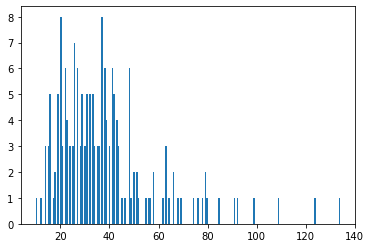

In [46]:
plt.hist(data_matrix.A1BG, bins=200)

In [84]:
data_matrix.describe()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,38.062500,118.568182,0.170455,2455.403409,102.568182,131.272727,2.670455,2.573864,45.119318,0.488636,...,806.892045,1773.965909,1643.812500,901.12500,89.926136,462.647727,110.863636,415.931818,1555.630682,1735.556818
std,20.511225,48.137849,0.662835,1278.351971,35.553998,69.401396,2.448190,2.420200,36.418245,0.770815,...,231.178632,487.710159,435.815209,241.33388,27.999392,129.147228,33.597511,122.379157,462.496696,490.915096
min,10.000000,39.000000,0.000000,439.000000,31.000000,9.000000,0.000000,0.000000,2.000000,0.000000,...,288.000000,640.000000,644.000000,352.00000,30.000000,179.000000,36.000000,136.000000,614.000000,723.000000
25%,24.000000,91.750000,0.000000,1474.500000,79.000000,83.750000,1.000000,1.000000,20.000000,0.000000,...,650.500000,1466.000000,1339.750000,725.50000,71.000000,380.000000,88.000000,328.000000,1247.000000,1418.750000
50%,34.000000,108.500000,0.000000,2286.500000,94.500000,122.000000,2.000000,2.000000,34.500000,0.000000,...,808.000000,1750.000000,1626.000000,869.50000,88.000000,448.000000,107.000000,409.500000,1562.500000,1733.000000
75%,43.250000,140.250000,0.000000,3101.750000,119.500000,162.000000,4.000000,3.250000,60.000000,1.000000,...,918.500000,2018.500000,1868.500000,1034.75000,103.000000,529.500000,131.250000,479.500000,1786.250000,1979.250000
max,134.000000,341.000000,6.000000,7137.000000,227.000000,496.000000,20.000000,14.000000,225.000000,5.000000,...,1824.000000,4240.000000,3761.000000,2046.00000,235.000000,1180.000000,255.000000,954.000000,3946.000000,3902.000000


Text(0.5, 1.0, 'Standard Deviation en fonction de Mean')

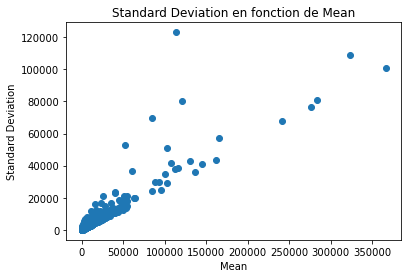

In [56]:
plt.scatter(x = data_matrix.mean().values,  y =data_matrix.std().values)
plt.ylabel("Standard Deviation")
plt.xlabel("Mean")
plt.title("Standard Deviation en fonction de Mean")

In [58]:
data_matrix.T.describe()

,GSM3533382,GSM3533252,GSM3533337,GSM3533314,GSM3533391,GSM3533362,GSM3533261,GSM3533364,GSM3533383,GSM3533232,...,GSM3533237,GSM3533268,GSM3533274,GSM3533241,GSM3533327,GSM3533291,GSM3533349,GSM3533339,GSM3533399,GSM3533403
count,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000,...,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000,28953.000000
mean,1121.974994,929.513487,840.968984,731.514903,776.938521,794.378234,1016.612786,1929.230132,732.779850,802.592132,...,729.665009,797.637827,1181.456913,826.509757,1095.101060,930.139778,843.149207,706.542051,825.212448,1142.241288
std,7933.961131,6480.974583,4545.201167,5562.735848,5273.871841,5031.214507,6595.691554,12904.004636,6401.242889,5618.694081,...,5155.154837,4787.642030,7899.233146,5495.906509,5977.921215,4924.077057,5552.632517,4375.045071,5429.376087,5264.705168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,2.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,101.000000,82.000000,63.000000,53.000000,61.000000,65.000000,74.000000,157.000000,67.000000,58.000000,...,52.000000,61.000000,92.000000,64.000000,82.000000,72.000000,74.000000,59.000000,73.000000,101.000000
75%,721.000000,595.000000,561.000000,428.000000,490.000000,513.000000,632.000000,1238.000000,455.000000,486.000000,...,439.000000,514.000000,752.000000,521.000000,716.000000,632.000000,551.000000,472.000000,535.000000,806.000000
max,535590.000000,424257.000000,291517.000000,395857.000000,375391.000000,334910.000000,430887.000000,884080.000000,436569.000000,390504.000000,...,361321.000000,327896.000000,548848.000000,378306.000000,395193.000000,322235.000000,369689.000000,289879.000000,372734.000000,290148.000000


In [90]:
CV = data_matrix.mean()/data_matrix.std()

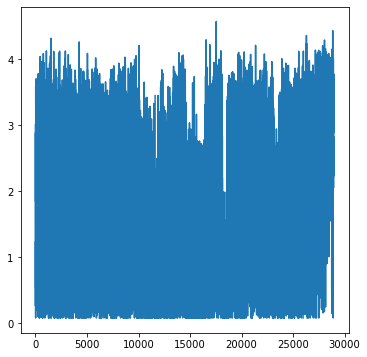

In [102]:
val = dict(CV).values()
plt.subplots(figsize=(20, 6))
plt.subplot(1,3,1)
plt.plot(val)

